In [2]:
!pip install os
!pip install openpyxl
!pip install gspread

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached gspread-6.1.4-py3-none-any.whl.metadata (11 kB)
  Using cached google_auth-2.37.0-py2.py3-none-any.whl.metadata (4.8 kB)
  Using cached google_auth_oauthlib-1.2.1-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached pyasn1_modules-0.4.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
Using cached gspread-6.1.4-py3-none-any.whl (57 kB)
Using cached google_auth-2.37.0-py2.py3-none-any.whl (209 kB)
Using cached google_auth_oauthlib-1.2.1-py2.py3-none-any.whl (24 kB)
Using cached cachetools-5.5.0-py3-none-any.whl (9.5 kB)
Using cached pyasn1_modules-0.4.1-py3-none-any.whl (181 kB)
Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl (24 kB)
Using cached rsa-


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import os
import openpyxl

# Construir ruta al archivo Excel
file_path = 'SIERRA_GORDA.xlsx'

# Lista de títulos esperados
column_names = [
    "Item", "Fecha", "CC", "Ruta", "Proyecto", "Origen", "Destino", "Tipo de Carga", 
    "Detalle", "Transportista", "Chofer", "Rut", "N° Contacto", "P-Camion", 
    "N° Guia Tecno Fast", "N° Guias Proveedor", "Comentarios", "%Ocupación", 
    "CLP $", "N° Etp", "N° OC", "Wip"
]

def procesar_data(file_path):
    # Especificar las hojas relevantes
    sheet_relevant = ["Fletes TF", "Movimientos internos", "Fletes Subcontratos"]

    # Crear una lista para almacenar los DataFrames
    combined_data = []

    # Procesar cada hoja
    for sheet in sheet_relevant:
        # Leer la hoja, comenzando desde la fila 11 (índice 10 en pandas) y solo columnas A-V
        df = pd.read_excel(file_path, sheet_name=sheet, skiprows=10, usecols="A:V", names=column_names)
        
        # Eliminar filas completamente vacías
        df = df.dropna(how='all')
        
        # Agregar columna con el nombre de la hoja
        df["Hoja"] = sheet
        
        # Agregar al conjunto combinado
        combined_data.append(df)

    # Combinar los DataFrames en uno solo
    final_dataframe = pd.concat(combined_data, ignore_index=True)
    return final_dataframe

# Ejecutar
df = procesar_data(file_path)

# Mostrar las primeras filas
df.head()


,Item,Fecha,CC,Ruta,Proyecto,Origen,Destino,Tipo de Carga,Detalle,Transportista,...,P-Camion,N° Guia Tecno Fast,N° Guias Proveedor,Comentarios,%Ocupación,CLP $,N° Etp,N° OC,Wip,Hoja
0,2,2024-02-01,21763.0,Directa,Centinela,Patio Zamorano,Centinela,Estructura,Contenedor 20' - Jaula sustancias peligrosas,Raquel Mendoza,...,LHPD-86,244386,Sin Guía,Estructuras,0.9,2115000.0,9,138572.0,40025.0,Fletes TF
1,3,2024-02-01,21763.0,Directa,Centinela,Patio Zamorano,Patio Calama,Estructura,Contenedor 20' - Jaula sustancias peligrosas,Raquel Mendoza,...,SGWS-45,244389,Sin Guía,Estructuras,1.0,2100000.0,1,138040.0,40025.0,Fletes TF
2,4,2024-02-01,21763.0,Directa,Centinela,Patio Zamorano,Patio Calama,Estructura,Jaula sustancias peligrosas,Raquel Mendoza,...,LLDV-50,244387,Sin Guía,Estructuras,1.0,2100000.0,3,138600.0,40025.0,Fletes TF
3,4,2024-02-01,21763.0,Directa,Centinela,Patio Zamorano,Patio Calama,Misceláneo,Cajón Misc. TF,Raquel Mendoza,...,LLDV-50,244387,Sin Guía,Estructuras,1.0,2100000.0,3,138600.0,40025.0,Fletes TF
4,5,2024-02-08,21763.0,Directa,Centinela,P - TF,Centinela,Estructura,Fundaciones madera 80x80x60,Deyfe,...,LPSV-21,244825,Sin Guía,Estructuras,0.2,470000.0,S/N,138052.0,40025.0,Fletes TF


In [4]:
len(df)

612

In [ ]:

# Construir ruta al archivo Excel
file_path = 'SIERRA_GORDA.xlsx'
def procesar_data_modulos(file_path):
    column_names = [
            "N° DE SERIE",
            "EDIFICIO",
            "PISO",
            "TRAMO",
            "TRANSPORTISTA",
            "CONDUCTOR",
            "P-CAMION",
            "N° DE GUIA",
            "FECHA DESPACHO",
            "VALOR FLETE",
            "N° EDP",
            "N° OC",
            "Observación"
        ]
    # Especificar las hojas relevantes
    sheet_relevant = ["MODULOS"]

    # Crear una lista para almacenar los DataFrames
    combined_data = []

    # Procesar cada hoja
    for sheet in sheet_relevant:
        df = pd.read_excel(file_path, sheet_name=sheet, skiprows=10, usecols="A:M", names=column_names)
        
        # Eliminar filas completamente vacías
        df = df.dropna(how='all')
        
        # Agregar columna con el nombre de la hoja
        df["Hoja"] = sheet
        
        # Agregar al conjunto combinado
        combined_data.append(df)

    # Combinar los DataFrames en uno solo
    final_dataframe = pd.concat(combined_data, ignore_index=True)
    return final_dataframe

# Ejecutar
dfm = procesar_data_modulos(file_path)

# Mostrar las primeras filas
dfm.head(1000)





,N° DE SERIE,EDIFICIO,PISO,TRAMO,TRANSPORTISTA,CONDUCTOR,P-CAMION,N° DE GUIA,FECHA DESPACHO,VALOR FLETE,N° EDP,N° OC,Observación,Hoja
0,50002,Trabajadores 1,1,Planta TF - Patio Antofagasta,Tcc,Luis Riquelme,TGBL-69,262675.0,2024-10-25,2450000.0,1.0,145780.0,NaN,MODULOS
1,50003,Trabajadores 1,1,Planta TF - Patio Antofagasta,Raquel Mendoza,Luis Bernal,SPYD-51,262646.0,2024-10-25,2450000.0,1.0,145210.0,NaN,MODULOS
2,50004,Trabajadores 1,1,Planta TF - Patio Antofagasta,Raquel Mendoza,Marcos Tapia,RGZH-94,262750.0,2024-10-28,2450000.0,1.0,145210.0,NaN,MODULOS
3,50005,Trabajadores 1,1,Planta TF - Patio Antofagasta,Raquel Mendoza,Gustavo Poblete,KRFY-58,262752.0,2024-10-28,2450000.0,1.0,145210.0,NaN,MODULOS
4,50006,Trabajadores 1,1,Planta TF - Patio Antofagasta,Raquel Mendoza,Gustavo Poblete,RBDP-38,262753.0,2024-10-28,2450000.0,2.0,145211.0,NaN,MODULOS
5,50007,Trabajadores 1,1,Planta TF - Patio Antofagasta,Tcc,Pedro Morales,SVFB-47,262760.0,2024-10-28,2450000.0,1.0,145780.0,NaN,MODULOS
6,50008,Trabajadores 1,1,Planta TF - Patio Antofagasta,Raquel Mendoza,Franco Veliz,TSTZ-47,262755.0,2024-10-28,2450000.0,2.0,145211.0,NaN,MODULOS
7,50009,Trabajadores 1,1,Planta TF - Patio Antofagasta,Telsi,Jorge Monsalvez,SLRR-40,262963.0,2024-11-04,2450000.0,1.0,145923.0,NaN,MODULOS
8,50010,Trabajadores 1,1,Planta TF - Patio Antofagasta,Manantial,Kristian Arredondo,DPLS-57,262964.0,2024-11-04,2450000.0,1.0,145370.0,NaN,MODULOS
9,50011,Trabajadores 1,1,Planta TF - Patio Antofagasta,Tcc,Luis Riquelme,TGBL-69,263014.0,2024-11-04,2450000.0,1.0,145780.0,NaN,MODULOS


In [51]:
!pip install pandas gspread google-auth google-auth-oauthlib os


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [167]:
import pandas as pd
import gspread
from google.oauth2.service_account import Credentials
import numpy as np

# Configurar la autenticación con Google Sheets API
def autenticar_cliente():
    scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
    creds = Credentials.from_service_account_file("credentials.json", scopes=scope)
    client = gspread.authorize(creds)
    return client

# Obtener datos ajustados para una hoja específica
def obtener_datos_google_sheets(spreadsheet_id, sheet_name, skiprows, usecols, column_names):
    client = autenticar_cliente()
    try:
        spreadsheet = client.open_by_key(spreadsheet_id)
        worksheet = spreadsheet.worksheet(sheet_name)
        
        # Obtener todos los valores como lista de listas
        rows = worksheet.get_all_values()
        
        # Aplicar skiprows
        rows = rows[skiprows:]

        # Crear DataFrame con encabezados personalizados
        df = pd.DataFrame(rows, columns=column_names[:len(rows[0])])

        # Filtrar columnas relevantes
        df = df[usecols]

        # Eliminar filas completamente vacías
        df = df.dropna(how='all')

        # Agregar nombre de la hoja
        df["Hoja"] = sheet_name

        print(f"Datos procesados exitosamente de la hoja: {sheet_name}")
        return df
    except Exception as e:
        print(f"Error al procesar la hoja '{sheet_name}': {e}")
        return None

# Procesar datos de múltiples hojas relevantes
def procesar_data_google_sheets(spreadsheet_id):
    # Columnas y configuraciones para hojas específicas
    sheet_config = {
        "Movimientos internos": {
            "skiprows": 10,
            "usecols": column_names,
            "column_names": column_names,
        },
        "Fletes Subcontratos": {
            "skiprows": 10,
            "usecols": column_names,
            "column_names": column_names,
        },
        "Fletes TF": {
            "skiprows": 10,
            "usecols": column_names,
            "column_names": column_names,
        },
    }

    combined_data = []

    for sheet_name, config in sheet_config.items():
        df = obtener_datos_google_sheets(
            spreadsheet_id,
            sheet_name,
            skiprows=config["skiprows"],
            usecols=config["usecols"],
            column_names=config["column_names"],
        )
        if df is not None:
            combined_data.append(df)

    # Combinar los DataFrames en uno solo
    final_dataframe = pd.concat(combined_data, ignore_index=True)

    final_dataframe["CLP $"] = (
        final_dataframe["CLP $"]
        .replace("", np.nan)  # Reemplazar valores vacíos con NaN
        .str.replace("[$,]", "", regex=True)  # Eliminar símbolos de moneda y separadores
        .astype(float)  # Convertir a tipo float
    )
    # Asegúrate de que todas las fechas estén en el formato correcto
    return final_dataframe

# Procesar datos específicos de la hoja "MODULOS"
def procesar_data_modulos_google_sheets(spreadsheet_id):
    column_names_modulos = [
        "N° DE SERIE",
        "EDIFICIO",
        "TIPO",
        "PISO",
        "TRAMO",
        "TRANSPORTISTA",
        "CONDUCTOR",
        "P-CAMION",
        "TIPO RAMPLA",
        "N° DE GUIA",
        "FECHA DESPACHO",
        "VALOR FLETE",
        "N° EDP",
        "N° OC",
        "Despacho",
        "Observación"
    ]

    try:
        df_modulos = obtener_datos_google_sheets(
            spreadsheet_id,
            "MODULOS",
            skiprows=5,
            usecols=column_names_modulos,
            column_names=column_names_modulos,
        )

        # Limpiar "N° DE SERIE"
        df_modulos["N° DE SERIE"] = df_modulos["N° DE SERIE"].astype(str).str.strip()
        df_modulos = df_modulos[df_modulos["N° DE SERIE"] != ""]
        df_modulos = df_modulos.dropna(subset=["N° DE SERIE"])
        df_modulos["VALOR FLETE"] = (
            df_modulos["VALOR FLETE"]
            .replace("", np.nan)  # Reemplazar valores vacíos con NaN
            .str.replace("[$,]", "", regex=True)  # Eliminar símbolos de moneda y separadores
            .astype(float)  # Convertir a tipo float
        )
        print("Datos de la hoja 'MODULOS' procesados exitosamente.")
        return df_modulos
    except Exception as e:
        print(f"Error al procesar la hoja 'MODULOS': {e}")
        return None

# Configuración del ID del Google Sheet
spreadsheet_id = "1Kl_5ufWDBFkhiyfvKOLpEtuCRlVMO5FEnU3WRX0PGQ8"

# Configuración de columnas esperadas
column_names = [
    "Item", "Fecha", "CC", "Ruta", "Proyecto", "Origen", "Destino", "Tipo de Carga", 
    "Detalle", "Transportista", "Chofer", "Rut", "N° Contacto", "P-CAMION", 
    "N° Guia Tecno Fast", "N° Guias Proveedor", "Comentarios",
    "CLP $", "N° Etp", "N° OC", "Wip"
]

data_general = procesar_data_google_sheets(spreadsheet_id)
data_modulos = procesar_data_modulos_google_sheets(spreadsheet_id)
data_general.head()





Datos procesados exitosamente de la hoja: Movimientos internos
Datos procesados exitosamente de la hoja: Fletes Subcontratos
Datos procesados exitosamente de la hoja: Fletes TF
Datos procesados exitosamente de la hoja: MODULOS
Datos de la hoja 'MODULOS' procesados exitosamente.


,Item,Fecha,CC,Ruta,Proyecto,Origen,Destino,Tipo de Carga,Detalle,Transportista,...,N° Contacto,P-CAMION,N° Guia Tecno Fast,N° Guias Proveedor,Comentarios,CLP $,N° Etp,N° OC,Wip,Hoja
0,1,31/1/2024,21763,Directa,Centinela,Antofagasta,Centinela,Maquinaria,Grúa Horquilla,Raquel Mendoza,...,,SHCV-95,SIN GUÍA,671,Sin comentarios,1250000.0,2,138037,40033,Movimientos internos
1,2,31/1/2024,21763,Directa,Centinela,Calama,Centinela,Maquinaria,Retroexcavadora,Raquel Mendoza,...,,SHCV-95,SIN GUÍA,4666,Sin comentarios,900000.0,2,138037,40033,Movimientos internos
2,3,2/2/2024,21763,Directa,Centinela,Alto Hospicio,Centinela,Estructura,Módulo IIFF,Raquel Mendoza,...,,SXPK-57,244502,Sin Guía,Sin comentarios,1050000.0,1,138040,40031,Movimientos internos
3,4,2/2/2024,21763,Directa,Centinela,Alto Hospicio,Centinela,Estructura,Módulo IIFF,Raquel Mendoza,...,,JXSG-88,244408 - 244410 - 361,Sin Guía,Sin comentarios,1050000.0,1,138040,40031,Movimientos internos
4,5,5/2/2024,21763,Directa,Centinela,Patio Calama,Centinela,Estructura,Contenedores,Raquel Mendoza,...,,,244584,Sin Guía,Sin comentarios,550000.0,4,138572,40031,Movimientos internos


In [164]:
data_modulos.head()

,N° DE SERIE,EDIFICIO,TIPO,PISO,TRAMO,TRANSPORTISTA,CONDUCTOR,P-CAMION,TIPO RAMPLA,N° DE GUIA,FECHA DESPACHO,VALOR FLETE,N° EDP,N° OC,Despacho,Observación,Hoja
0,44201,AMPLIACIÓN POLICLÍNICO,Policlínico,1° piso,SLC-CALAMA,TCC,CRISTIAN JARA,TCCW-61,NORMAL,256855,26/7/2024,1050000.0,15,144978,si,,MODULOS
1,45076,AMPLIACIÓN POLICLÍNICO,Policlínico,1° piso,SLC-CALAMA,GTC,MARCELO HERRERA,PRKX-78,NORMAL,256550,23/7/2024,1050000.0,13,144975,si,,MODULOS
2,45253,CONTROL DE ACCESO,CONTROL DE ACCESO,1° piso,SLC-CALAMA,RAQUEL MENDOZA,JORGE DUSTA,HPJF-24,NORMAL,254620,25/6/2024,1050000.0,66,143617,si,,MODULOS
3,46828,CONTROL DE ACCESO,CONTROL DE ACCESO,1° piso,SLC-CALAMA,MANANTIAL,SERVANDO ALMONACID,DRVF-50,NORMAL,254139,17/6/2024,1050000.0,27,143135,si,,MODULOS
4,46829,AMPLIACIÓN POLICLÍNICO,Policlínico,1° piso,SLC-CALAMA,MAFE,GARY BAZAN,LPCP-29,NORMAL,255651,9/7/2024,1050000.0,39,144441,si,,MODULOS


In [155]:
data_modulos.head()

,N° DE SERIE,EDIFICIO,TIPO,PISO,TRAMO,TRANSPORTISTA,CONDUCTOR,P-CAMION,TIPO RAMPLA,N° DE GUIA,FECHA DESPACHO,VALOR FLETE,N° EDP,N° OC,Despacho,Observación,Hoja
0,44201,AMPLIACIÓN POLICLÍNICO,Policlínico,1° piso,SLC-CALAMA,TCC,CRISTIAN JARA,TCCW-61,NORMAL,256855,NaT,1050000.0,15,144978,si,,MODULOS
1,45076,AMPLIACIÓN POLICLÍNICO,Policlínico,1° piso,SLC-CALAMA,GTC,MARCELO HERRERA,PRKX-78,NORMAL,256550,NaT,1050000.0,13,144975,si,,MODULOS
2,45253,CONTROL DE ACCESO,CONTROL DE ACCESO,1° piso,SLC-CALAMA,RAQUEL MENDOZA,JORGE DUSTA,HPJF-24,NORMAL,254620,NaT,1050000.0,66,143617,si,,MODULOS
3,46828,CONTROL DE ACCESO,CONTROL DE ACCESO,1° piso,SLC-CALAMA,MANANTIAL,SERVANDO ALMONACID,DRVF-50,NORMAL,254139,NaT,1050000.0,27,143135,si,,MODULOS
4,46829,AMPLIACIÓN POLICLÍNICO,Policlínico,1° piso,SLC-CALAMA,MAFE,GARY BAZAN,LPCP-29,NORMAL,255651,NaT,1050000.0,39,144441,si,,MODULOS


In [70]:
data_general.head()

,Item,Fecha,CC,Ruta,Proyecto,Origen,Destino,Tipo de Carga,Detalle,Transportista,...,N° Contacto,P-CAMION,N° Guia Tecno Fast,N° Guias Proveedor,Comentarios,CLP $,N° Etp,N° OC,Wip,Hoja
0,1,1/31/2024,21763,Directa,Centinela,Antofagasta,Centinela,Maquinaria,Grúa Horquilla,Raquel Mendoza,...,,SHCV-95,SIN GUÍA,671,Sin comentarios,"$ 1,250,000",2,138037,40033,Movimientos internos
1,2,1/31/2024,21763,Directa,Centinela,Calama,Centinela,Maquinaria,Retroexcavadora,Raquel Mendoza,...,,SHCV-95,SIN GUÍA,4666,Sin comentarios,"$ 900,000",2,138037,40033,Movimientos internos
2,3,2/2/2024,21763,Directa,Centinela,Alto Hospicio,Centinela,Estructura,Módulo IIFF,Raquel Mendoza,...,,SXPK-57,244502,Sin Guía,Sin comentarios,"$ 1,050,000",1,138040,40031,Movimientos internos
3,4,2/2/2024,21763,Directa,Centinela,Alto Hospicio,Centinela,Estructura,Módulo IIFF,Raquel Mendoza,...,,JXSG-88,244408 - 244410 - 361,Sin Guía,Sin comentarios,"$ 1,050,000",1,138040,40031,Movimientos internos
4,5,2/5/2024,21763,Directa,Centinela,Patio Calama,Centinela,Estructura,Contenedores,Raquel Mendoza,...,,,244584,Sin Guía,Sin comentarios,"$ 550,000",4,138572,40031,Movimientos internos


In [129]:
# Procesar los datos
data = procesar_data_google_sheets(spreadsheet_id)
data_1 = procesar_data_modulos_google_sheets(spreadsheet_id)

Datos procesados exitosamente de la hoja: Movimientos internos
Datos procesados exitosamente de la hoja: Fletes Subcontratos
Datos procesados exitosamente de la hoja: Fletes TF
Datos procesados exitosamente de la hoja: MODULOS
Datos de la hoja 'MODULOS' procesados exitosamente.


In [124]:
import pandas as pd
import numpy as np

# Asegurarse de que no haya valores vacíos o inconsistentes
data["CLP $"] = (
    data["CLP $"]
    .replace("", np.nan)  # Reemplazar valores vacíos con NaN
    .str.replace("[$,]", "", regex=True)  # Eliminar símbolos de moneda y separadores
    .astype(float)  # Convertir a tipo float
)

# Verificar el resultado
print(data["CLP $"].head())


0    1250000.0
1     900000.0
2    1050000.0
3    1050000.0
4     550000.0
Name: CLP $, dtype: float64


In [109]:

# Convertir columnas a datetime
data["Fecha"] = pd.to_datetime(data["Fecha"], errors="coerce")
data_1["FECHA DESPACHO"] = pd.to_datetime(data_1["FECHA DESPACHO"], errors="coerce")

# Eliminar filas con fechas inválidas
data = data.dropna(subset=["Fecha"])
data_1 = data_1.dropna(subset=["FECHA DESPACHO"])

filtered_data = data
filtered_data_1 = data_1

C:\Users\acer\AppData\Local\Temp\ipykernel_33480\1322160752.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_1["FECHA DESPACHO"] = pd.to_datetime(data_1["FECHA DESPACHO"], errors="coerce")


In [89]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [110]:
def generar_colores(categorias):
    """Genera colores únicos para cada categoría usando colormap."""
    colormap = plt.colormaps["tab20"]  # Nueva sintaxis de matplotlib
    colores = [colormap(i / len(categorias)) for i in range(len(categorias))]
    return colores

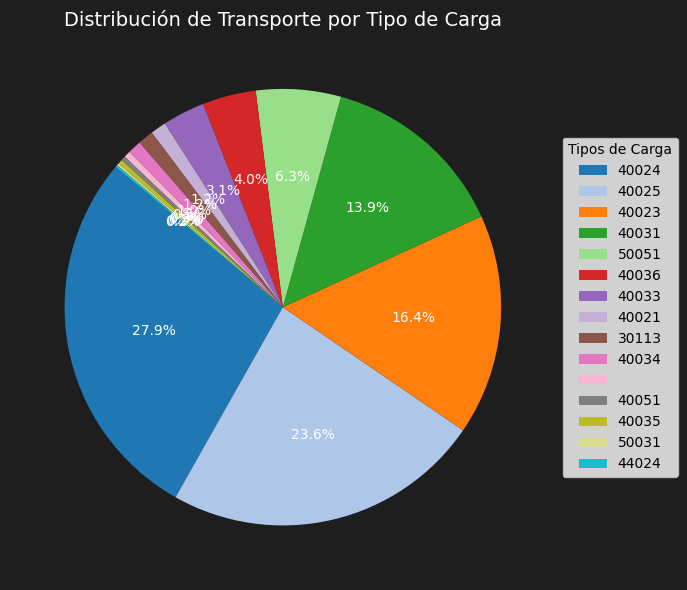

In [126]:
import matplotlib.pyplot as plt

def generar_colores(categorias):
    """Genera colores únicos para cada categoría usando colormap."""
    colormap = plt.colormaps["tab20"]  # Nueva sintaxis de matplotlib
    colores = [colormap(i / len(categorias)) for i in range(len(categorias))]
    return colores



# 1. Gráfico Circular: Distribución por Tipo de Carga
kpi_images = {}
if "Wip" in data.columns:
    plt.figure(figsize=(8, 6), facecolor="#1e1e1e")
    data = data["Wip"].value_counts()
    categorias = data.index

    # Generar colores dinámicamente
    colores = generar_colores(categorias)
    wedges, texts, autotexts = plt.pie(data, autopct="%1.1f%%", colors=colores,
                                    textprops=dict(color="white"), startangle=140)
    plt.title("Distribución de Transporte por Tipo de Carga", fontsize=14, color="white")

    # Ajustar etiquetas fuera del gráfico
    plt.legend(wedges, data.index, title="Tipos de Carga", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

    plt.tight_layout()
    plt.gca().set_facecolor("#1e1e1e")

    plt.show()
    plt.close()

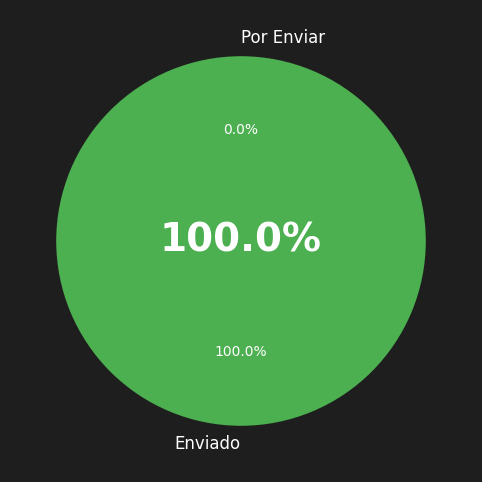

In [127]:
# 1. Porcentaje de N° DE SERIE con N° EDP no vacío
series_con_edp = data_1['N° EDP'].notna().sum()
porcentaje_con_edp = (series_con_edp / len(data_1)) * 100
porcentaje_sin_edp = 100 - porcentaje_con_edp

plt.figure(figsize=(8, 6), facecolor="#1e1e1e")
sizes = [porcentaje_sin_edp, porcentaje_con_edp]
labels = ['Por Enviar', 'Enviado']
colors = ['#FF6F61', '#4CAF50']

wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
                                    colors=colors, textprops={'fontsize': 12, 'color': 'white'})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.text(0, 0, f"{porcentaje_con_edp:.1f}%", ha='center', va='center', fontsize=28, 
            fontweight='bold', color="white")

plt.show()
plt.close()

1.1


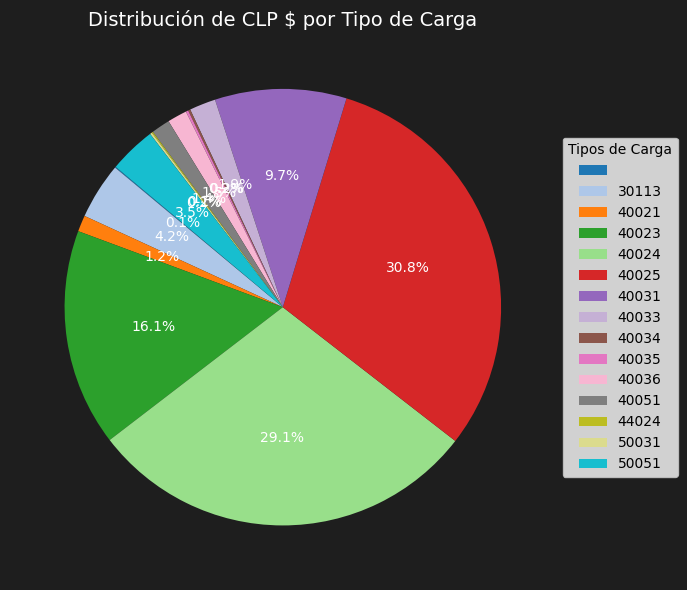

In [135]:
if "Wip" in data_general.columns and "CLP $" in data_general.columns:
    plt.figure(figsize=(8, 6), facecolor="#1e1e1e")
    print(1.1)
    
    
    # Agrupar por Tipo de Carga y sumar CLP $
    data = data_general.groupby("Wip")["CLP $"].sum()
    
    categorias = data.index

    # Generar colores dinámicamente
    colores = generar_colores(categorias)

    # Crear el gráfico circular
    wedges, texts, autotexts = plt.pie(
        data, 
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',  # Solo muestra porcentajes mayores a 0
        colors=colores,
        textprops=dict(color="white"),
        startangle=140
    )

    # Agregar una leyenda
    plt.legend(wedges, data.index, title="Tipos de Carga", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Títulos y formato
    plt.title("Distribución de CLP $ por Tipo de Carga", fontsize=14, color="white")
    plt.tight_layout()
    plt.gca().set_facecolor("#1e1e1e")  # Fondo oscuro
    plt.show()
    plt.close()

C:\Users\acer\AppData\Local\Temp\ipykernel_33480\1740513846.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_025["Categoría"] = "Otros"


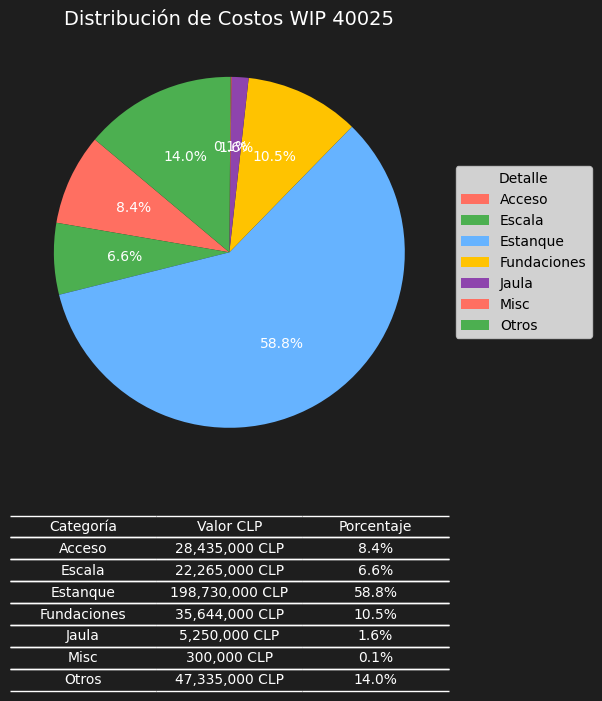

In [139]:
if "Wip" in data_general.columns:
    # Filtrar solo WIP 40025
    filtered_data_025 = data_general[data_general["Wip"] == "40025"]

    # Diccionario de palabras clave para clasificar
    diccionario_palabras_clave = {
        "Misc": ["Misc"],
        "Jaula": ["Jaula"],
        "Fundaciones": ["Fundaciones"],
        "Estanque": ["Estanque"],
        "Escala": ["Escala"],
        "Acceso": ["Acceso"],
    }

    # Crear una nueva columna para clasificar las categorías
    filtered_data_025["Categoría"] = "Otros"

    for categoria, palabras in diccionario_palabras_clave.items():
        for palabra in palabras:
            filtered_data_025.loc[
                filtered_data_025["Detalle"].str.contains(palabra, na=False, case=False), "Categoría"
            ] = categoria

    # Calcular la distribución
    data_distribucion = filtered_data_025.groupby("Categoría")["CLP $"].sum()
    categorias = data_distribucion.index
    valores = data_distribucion.values

    # Verificar si hay datos válidos
    if len(valores) == 0 or sum(valores) == 0:
        print("No hay datos para WIP 40025 después de clasificar.")
    else:
        total_dinero = sum(valores)

        # Crear tabla de datos
        tabla_datos = [
            [categoria, f"{valor:,.0f} CLP", f"{(valor / total_dinero) * 100:.1f}%"]
            for categoria, valor in zip(categorias, valores)
        ]

        # Crear gráfico circular
        plt.figure(figsize=(8, 8), facecolor="#1e1e1e")
        colores = ["#FF6F61", "#4CAF50", "#66B3FF", "#FFC300", "#8E44AD"][:len(categorias)]

        wedges, texts, autotexts = plt.pie(
            data_distribucion, labels=None, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', colors=colores, startangle=140,
            textprops=dict(color="white")
        )
        plt.legend(wedges, categorias, title="Detalle", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.title("Distribución de Costos WIP 40025", fontsize=14, color="white")
        plt.gca().set_facecolor("#1e1e1e")

        # Crear tabla
        tabla = plt.table(
            cellText=tabla_datos,
            colColours=["#FF6F61", "#FF6F61", "#FF6F61"],
            colLabels=["Categoría", "Valor CLP", "Porcentaje"],
            cellLoc="center",
            loc="bottom",
            bbox=[0.0, -0.5, 1.0, 0.4],
            edges="horizontal",
        )
        for key, cell in tabla.get_celld().items():
            cell.set_edgecolor("white")
            cell.set_text_props(color="white")
            cell.set_facecolor("#1e1e1e")
        plt.tight_layout()

        plt.show()
        plt.close()


In [220]:
data = procesar_data_google_sheets(spreadsheet_id)
data_1 = procesar_data_modulos_google_sheets(spreadsheet_id)


Datos procesados exitosamente de la hoja: Movimientos internos
Datos procesados exitosamente de la hoja: Fletes Subcontratos
Datos procesados exitosamente de la hoja: Fletes TF
Datos procesados exitosamente de la hoja: MODULOS
Datos de la hoja 'MODULOS' procesados exitosamente.


In [221]:

data["Fecha"] = pd.to_datetime(data["Fecha"], errors="coerce")
# Crear una copia del DataFrame original
filtered_data = data.copy()
start_date = pd.Timestamp("today")
end_date = pd.Timestamp("today")

filtered_data= data.drop(data[(data["Fecha"] < start_date) | (data["Fecha"] > end_date)].index)

# Cantidad de filas eliminadas
eliminated_rows = len(data) - len(filtered_data)
print(f"Cantidad de filas eliminadas: {eliminated_rows}")
filtered_data.head()




Cantidad de filas eliminadas: 605


C:\Users\acer\AppData\Local\Temp\ipykernel_33480\3968277963.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["Fecha"] = pd.to_datetime(data["Fecha"], errors="coerce")


,Item,Fecha,CC,Ruta,Proyecto,Origen,Destino,Tipo de Carga,Detalle,Transportista,...,N° Contacto,P-CAMION,N° Guia Tecno Fast,N° Guias Proveedor,Comentarios,CLP $,N° Etp,N° OC,Wip,Hoja


In [199]:
start_date = pd.Timestamp("2001-01-01")
end_date = pd.Timestamp("today")

In [200]:
data_f = data.copy()

data_f["Fecha"] = pd.to_datetime(data_f["Fecha"], errors="coerce")

data_f = data_f.dropna(subset=["Fecha"])

data_f["Fecha_int"] = (data_f["Fecha"].view("int64") // 10**6).astype(int)

#data_1_f["FECHA_DESPACHO_int"] = (data_1_f["FECHA DESPACHO"].view("int64") // 10**6).astype(int)

start_date_int = int(start_date.timestamp() * 1000)
end_date_int = int(end_date.timestamp() * 1000)


print(start_date_int)

print(end_date_int)

for i in data:
    print(data["Fecha"])
    
#filtered_data = data_f[
 #   (data_f["FECHA_DESPACHO_int"].astype(int) >= int(start_date_int)) &
 #   (data_1_f["FECHA_DESPACHO_int"].astype(int) <= int(end_date_int))
#]


978307200000
1734696208371
0       31/1/2024
1       31/1/2024
2        2/2/2024
3        2/2/2024
4        5/2/2024
          ...    
600     5/12/2024
601    10/12/2024
602    11/12/2024
603    12/12/2024
604    17/12/2024
Name: Fecha, Length: 605, dtype: object
0       31/1/2024
1       31/1/2024
2        2/2/2024
3        2/2/2024
4        5/2/2024
          ...    
600     5/12/2024
601    10/12/2024
602    11/12/2024
603    12/12/2024
604    17/12/2024
Name: Fecha, Length: 605, dtype: object
0       31/1/2024
1       31/1/2024
2        2/2/2024
3        2/2/2024
4        5/2/2024
          ...    
600     5/12/2024
601    10/12/2024
602    11/12/2024
603    12/12/2024
604    17/12/2024
Name: Fecha, Length: 605, dtype: object
0       31/1/2024
1       31/1/2024
2        2/2/2024
3        2/2/2024
4        5/2/2024
          ...    
600     5/12/2024
601    10/12/2024
602    11/12/2024
603    12/12/2024
604    17/12/2024
Name: Fecha, Length: 605, dtype: object
0       31/1/2024
1  

C:\Users\acer\AppData\Local\Temp\ipykernel_33480\573662362.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_f["Fecha"] = pd.to_datetime(data_f["Fecha"], errors="coerce")
C:\Users\acer\AppData\Local\Temp\ipykernel_33480\573662362.py:7: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data_f["Fecha_int"] = (data_f["Fecha"].view("int64") // 10**6).astype(int)


In [ ]:
data_f.head(20)

In [ ]:
data_1_f.head(20)